In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv("Amazon Sale Report.csv")
print(df.head())

# Check missing values
print(df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Fill missing values in 'Category' column
df['Category'].fillna("Unknown", inplace=True)

# Remove outliers from Sales
df = df[df['Amount'] < df['Amount'].quantile(0.99)]  # Removing top 1% extreme values

# Save cleaned dataset
df.to_csv("cleaned_sales_data.csv", index=False)


C:\Users\siddh\AppData\Local\Temp\ipykernel_10960\4173719203.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.

In [15]:
top_products = df.groupby('SKU')['Amount'].sum().sort_values(ascending=False).head(10)
print(top_products)

SKU
J0230-SKD-M        523251.20
JNE3797-KR-L       523111.77
J0230-SKD-S        475387.14
JNE3797-KR-M       449195.16
JNE3797-KR-S       405760.57
JNE3797-KR-XL      329143.24
J0230-SKD-L        303290.95
JNE3797-KR-XS      299214.70
SET268-KR-NP-XL    282482.96
JNE3797-KR-XXL     275966.88
Name: Amount, dtype: float64


<AxesSubplot:title={'center':'Monthly Sales Trend'}, xlabel='Month'>

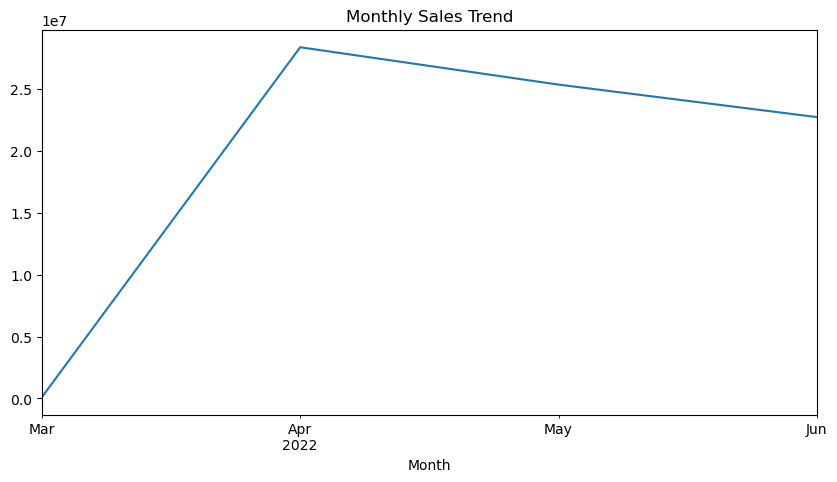

In [16]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Amount'].sum()
monthly_sales.plot(kind='line', figsize=(10,5), title="Monthly Sales Trend")

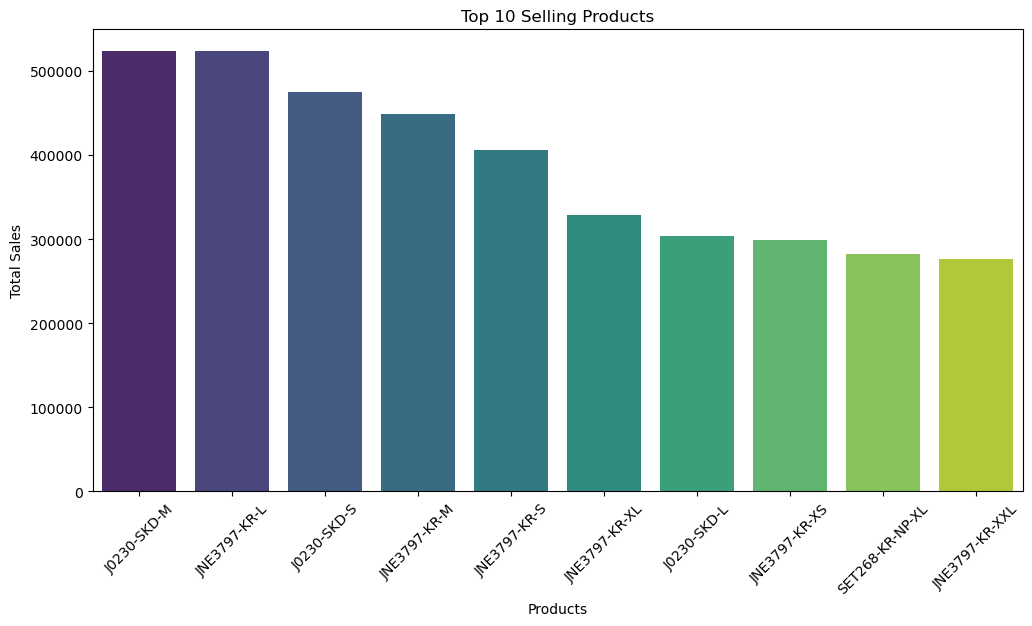

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Selling Products")
plt.xlabel("Products")
plt.ylabel("Total Sales")
plt.show()


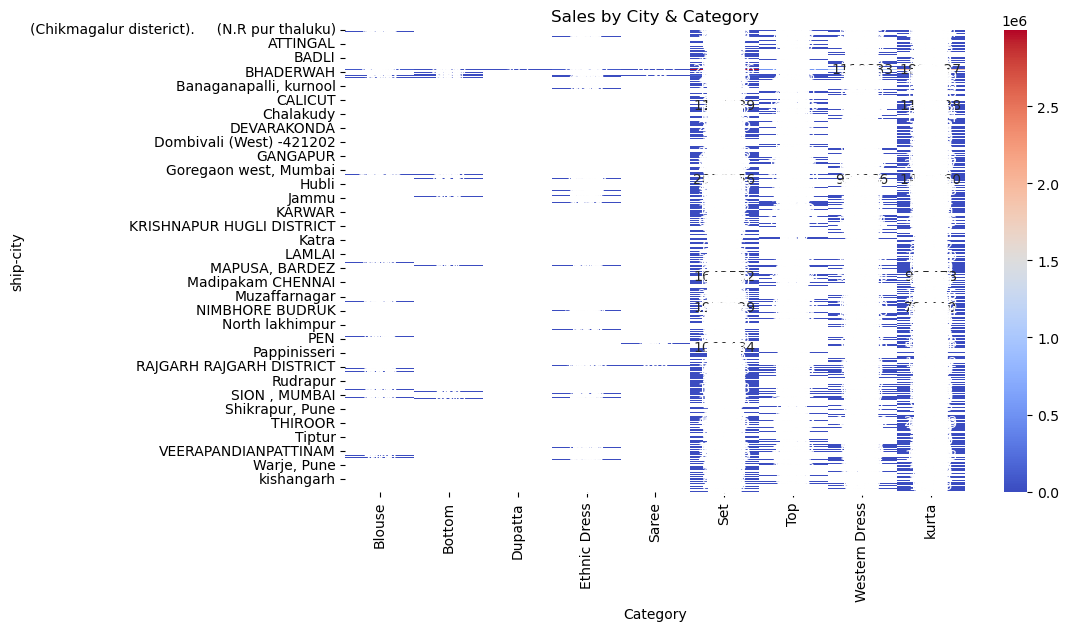

In [21]:
city_category_sales = df.pivot_table(index='ship-city', columns='Category', values='Amount', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(city_category_sales, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Sales by City & Category")
plt.show()